<a href="https://colab.research.google.com/github/sidneyarcidiacono/fastai-practical-deep-learning/blob/main/notebooks/snake_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import os
key = os.environ.get('AZURE_SEARCH_KEY', 'bd220979600745d3b0f6aa712b11d062')

In [18]:
results = search_images_bing(key, 'python')
ims = results.attrgot('content_url')
len(ims)

150

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#hide
ims = ['https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fb%2Fb4%2FPython_reticulatus_%25D1%2581%25D0%25B5%25D1%2582%25D1%2587%25D0%25B0%25D1%2582%25D1%258B%25D0%25B9_%25D0%25BF%25D0%25B8%25D1%2582%25D0%25BE%25D0%25BD-2.jpg%2F1200px-Python_reticulatus_%25D1%2581%25D0%25B5%25D1%2582%25D1%2587%25D0%25B0%25D1%2582%25D1%258B%25D0%25B9_%25D0%25BF%25D0%25B8%25D1%2582%25D0%25BE%25D0%25BD-2.jpg&f=1&nofb=1']

In [26]:
dest = 'drive/MyDrive/snake-images/python.jpg'
download_url(ims[0], dest)

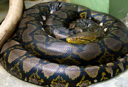

In [27]:
im = Image.open(dest)
im.to_thumb(128,128)

In [29]:
snake_types = 'python','viper','cobra'
path = Path('snakes')

In [30]:
if not path.exists():
    path.mkdir()
    for o in snake_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} snake')
        download_images(dest, urls=results.attrgot('contentUrl'))